# Demo on Linear Regression using Python

In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X

## Packages used:

### NumPy 

It is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

### matplotlib

It is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+

### pylab

It has few scientific functions which can be used in python

## pandas:

pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series

## sklearn:

Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language.[2] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy

In [ ]:
## Importing the necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

# Boston Housing Data

### Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

### Relevant Information:

   Concerns housing values in suburbs of Boston.

### Number of Instances:
506

### Number of Attributes: 
13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

### Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate pe 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000 USD

In [3]:
# Loading the data to the dataframe
#df = pd.DataFrame(boston.data)
df_x=pd.DataFrame(boston.data,columns=boston.feature_names)
df_y=pd.DataFrame(boston.target)

In [4]:
## Printing Feartues and Target
df_y.columns=['Median value']
#print(df_x)
#print(df_y)
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df_y.head()

,Median value
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
# statistical description about the dataframe
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [10]:
#Creating train and test data for modling
#test_size=0.2 says 80% train 20% test
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [18]:
#loading the model using train data
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
#Now predicting value of y from the trained model
y_pred=reg.predict(X_test)

In [13]:
y_test

,Median value
8,16.5
289,24.8
68,17.4
211,19.3
226,37.6
70,24.2
55,35.4
470,19.9
409,27.5
154,17.0


In [19]:
y_pred[1]

array([26.98544801])

In [23]:
# mean square error methode for checking 
np.mean((y_pred-y_test)**2)
#here 25.24% gives wrong answer

Median value    25.407977
dtype: float64

In [24]:
# Use score method to get accuracy of model
score = reg.score(X_test, y_test)
print(score)
#here 72.64% gives wrong answer

0.7264701379683001


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


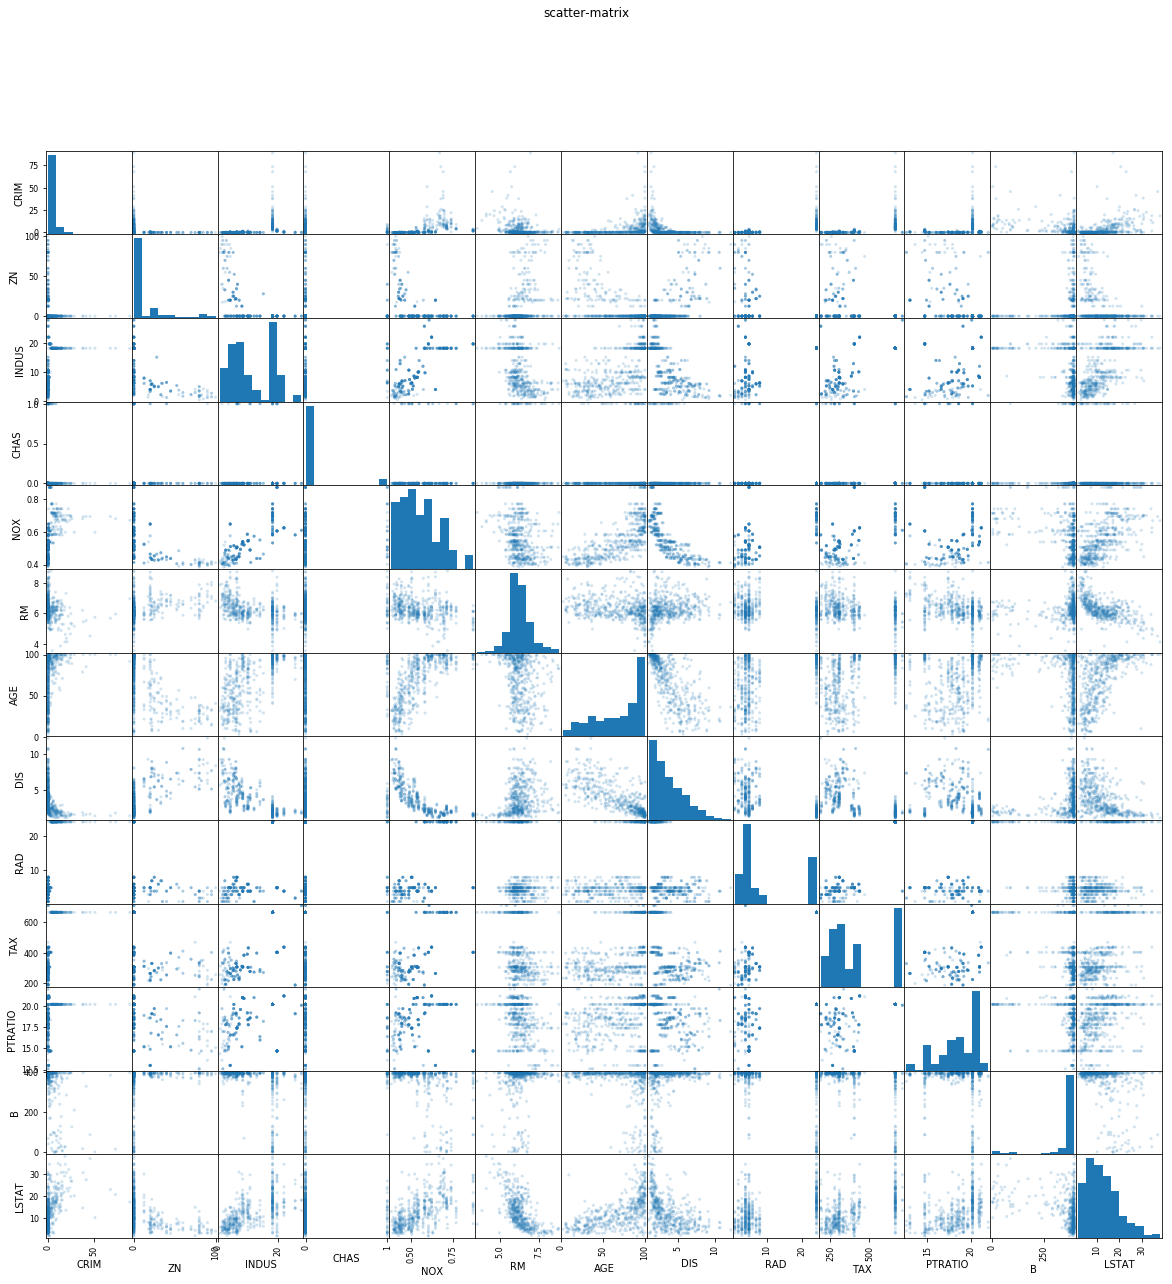

In [22]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df_x, alpha=0.2, figsize=(20, 20), diagonal='hist')
plt.suptitle('scatter-matrix')

plt.show()

In [25]:
import pandas as pd
import seaborn as sb
from sklearn import datasets

sb.set(font_scale=1.2, style="ticks") #set styling preferences
dataset = datasets.load_boston()

#convert to pandas data frame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()
df = df.rename(columns={'target': 'median_value', 'oldName2': 'newName2'})
#df.DIS = df.DIS.round(0)

In [26]:
df.describe().round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_value
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.0,391.4,11.4,21.2
75%,3.6,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


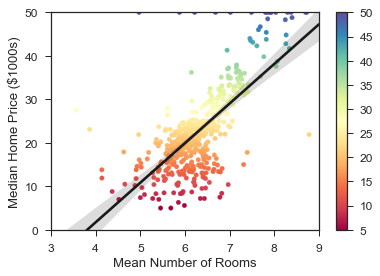

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
points = plt.scatter(df["RM"], df["median_value"],
                     c=df["median_value"], s=20, cmap="Spectral") #set style options

#add a color bar
plt.colorbar(points)

#set limits
plt.xlim(3, 9)
plt.ylim(0, 50)

#build the plot
plot = sb.regplot("RM", "median_value", data=df, scatter=False, color=".1")
plot = plot.set(ylabel='Median Home Price ($1000s)', xlabel='Mean Number of Rooms') #add labels